Importing necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Uploading the connection with Google Drive to upload data:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now let's upload a file with advertising data:

In [3]:
name_of_file='Advertising.csv'
path = '/content/gdrive/My Drive/Colab Notebooks/'+ name_of_file

In [4]:
df = pd.read_csv(path,
                 sep=",",
                 skiprows=0,
             engine='python')

print (df)

     Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]


The dataframe contains budgets (in thousands of dollars) for each channel and sales generated  (in thousands of units)

The task: to find a function that predicts the output sales based on the input - budgets for TV, radio and newspaper

**Research questions:**

Which media contribute to sales?

What are the relationship between the features and the response?

In [5]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

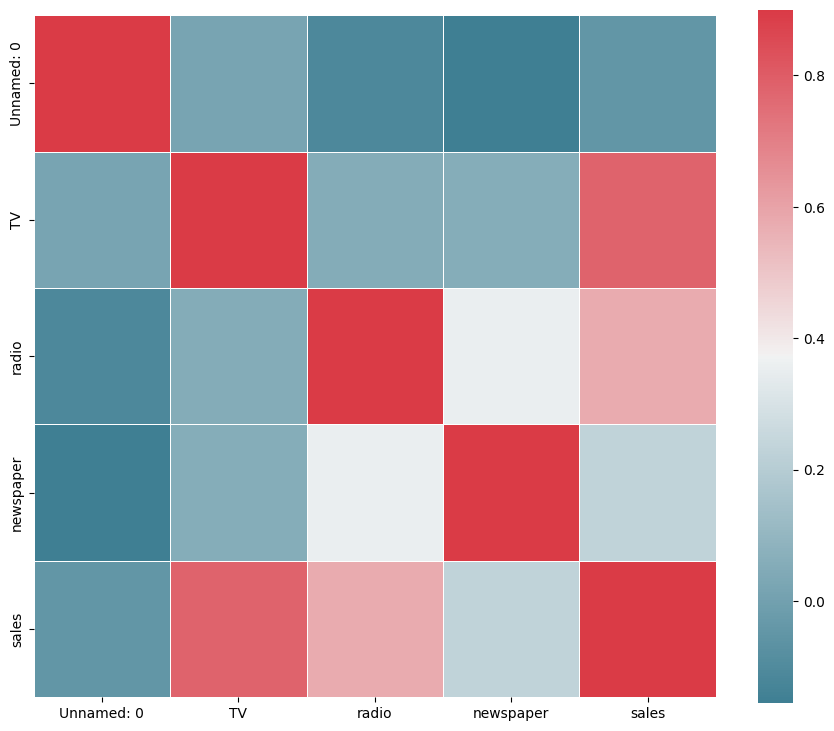

In [6]:
mask = np.zeros_like(df.corr(), dtype=bool)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

We can see that the TV has the hughest correlation with sales.
Now let's see is there is any linearity?

Text(0, 0.5, 'sales')

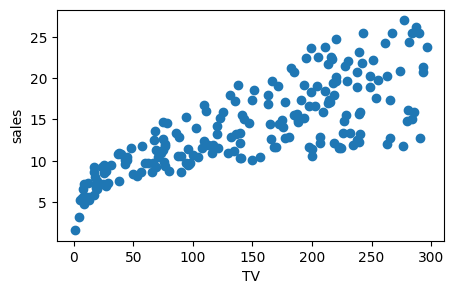

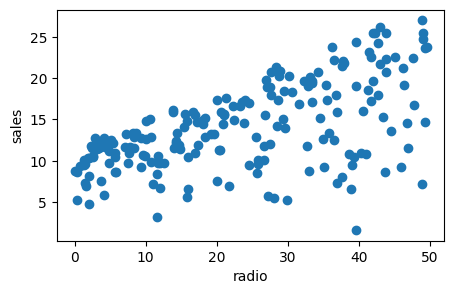

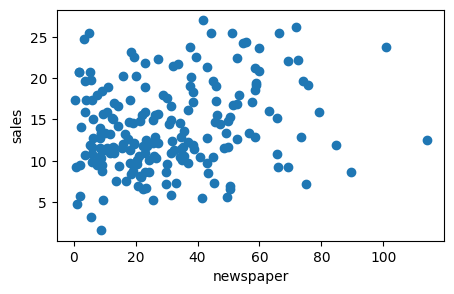

In [7]:
f, ax = plt.subplots(figsize=(5, 3))
plt.scatter(df["TV"], df["sales"])
plt.xlabel("TV")
plt.ylabel("sales")

f, ax = plt.subplots(figsize=(5, 3))
plt.scatter(df["radio"], df["sales"])
plt.xlabel("radio")
plt.ylabel("sales")

f, ax = plt.subplots(figsize=(5, 3))
plt.scatter(df["newspaper"], df["sales"])
plt.xlabel("newspaper")
plt.ylabel("sales")

The most linear is again on the TV/Sales chart.
Now let's prepare the data.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [9]:
df = df.drop(df.columns[0], axis = 1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
x = df.drop("sales", axis = 1)
y = df["sales"]

print(f"'x--predictors'\nSize: {x.shape}\n{x.head()}")
print(f"'y--target'\nSize: {y.shape}\n{y.head()}")

'x--predictors'
Size: (200, 3)
      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
'y--target'
Size: (200,)
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("x_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)
x_test size: (50, 3)
y_test size: (50,)


In [12]:
results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [14]:
def linreg_model(x_train, x_test):

    linreg = LinearRegression()

    linreg.fit(x_train, y_train)

    y_pred = linreg.predict(x_test)

    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))

    f, ax = plt.subplots(figsize=(5, 3))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")

    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test),
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: 0.8843196200174288
MAE: 1.4023124989385076
MSE: 2.880023730094193
RMSE: 1.697063266379363
Cross-Val Results: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Cross-Val Mean: 0.8853562237979616


<ipython-input-15-c1e7262540e3>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(linreg_all_results, ignore_index=True)


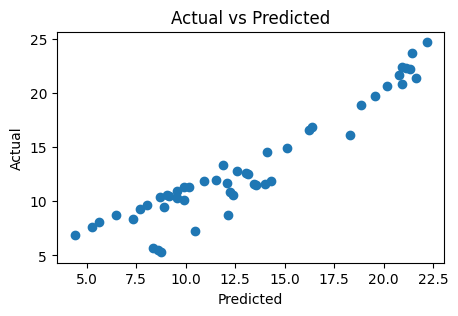

In [15]:
linreg_all_results = linreg_model(x_train, x_test)

cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

results = results.append(linreg_all_results, ignore_index=True)

We could see that the most linear correlation was in case of TV, so let's try to use its meanings as a predictors.

R2: 0.43100480902944716
MAE: 2.273770594370873
MSE: 9.179298570399794
RMSE: 3.0297357261648736
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


<ipython-input-16-6a2df6ed2408>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(linreg_TV_results, ignore_index=True)


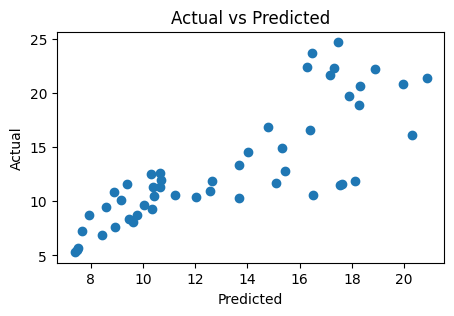

In [16]:
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

results = results.append(linreg_TV_results, ignore_index=True)

Not so good as it was with all the predictors.

R2: 0.8850764340201793
MAE: 1.3886802126434379
MSE: 2.8539947557761023
RMSE: 1.6893770318599997
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


<ipython-input-17-92d2165bfb3f>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(linreg_TandR_results, ignore_index=True)


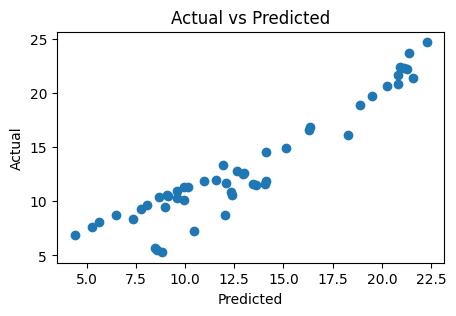

In [17]:
linreg_TandR_results = linreg_model(x_train[["TV", "radio"]], x_test[["TV", "radio"]])

cv_score = cross_val_score(LinearRegression(), x[["TV", "radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

linreg_TandR_results.update({"Predictor/s":"TV & radio", "Cross-Val Mean": cv_score.mean() * 100})

results = results.append(linreg_TandR_results, ignore_index=True)

So, let's sum up.

In [18]:
results.head()

,Predictor/s,R2,MAE,MSE,RMSE,Cross-Val Mean
0,All,88.431962,1.402312,2.880024,1.697063,88.535622
1,TV,43.100481,2.273771,9.179299,3.029736,56.869659
2,TV & radio,88.507643,1.388680,2.853995,1.689377,88.696705


So the best effect has the parallel advertising on TV and Radio.